In [30]:
from utils.inference_data_helper import create_inference_data_from_trace, log_to_exp, logit_to_probability

variable_list = ['a_m']
graph_title =  "" #"Module effect on iterations (log-scale)"
file_name = "overhead_modules_single_parameter_transformed"

transformations = {
    'a_m': log_to_exp,

}

table_location = f"tables/{file_name}.csv"
image_location = f"images/{file_name}.pdf"


### Generate Summary object

In [31]:
import arviz as az
import pandas as pd
from utils.inference_data_helper import create_inference_data_from_trace, log_to_exp
pd.set_option('display.max_rows', 500)  # Increase number of rows

# Example usage
trace = az.from_netcdf("overhead_model_single_parameter.nc")

idata = create_inference_data_from_trace(trace, variable_list, transformations)
summary = az.summary(idata, variable_list, hdi_prob=0.89)


### Replace numeric identifiers with descriptive identifiers

In [32]:
from utils.summary_table_formatting import update_table, get_replacement_list
from utils.design_matrix_creator import get_design_matricies

data = pd.read_csv("../single_parameter/combined_data/statistics.csv")

_, module_matrix, parameter_matrix, interaction_matrix = get_design_matricies(data, 'AlgorithmIterations')

module_names = get_replacement_list(module_matrix.columns)
parameter_names = get_replacement_list(parameter_matrix.columns)
interaction_names = get_replacement_list(interaction_matrix.columns)

update_table(summary, 'a_m', replacement=module_names)
update_table(summary, 'b_p', replacement=parameter_names)
update_table(summary, 'g_mp', replacement=interaction_names)

summary = summary.sort_values(by='mean', ascending=True)

Module Matrix shape: (9360, 24)
Parameter Matrix shape: (9360, 12)
Interaction Matrix shape: (9360, 288)
Observation Matrix shape: (9360, 1)


### Save summary table as CSV

In [33]:
summary.to_csv(table_location, index=True)

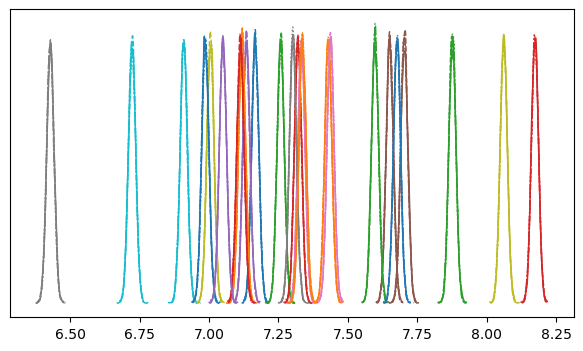

In [34]:
import arviz as az
import matplotlib.pyplot as plt

axes = az.plot_trace(idata, var_names=variable_list, figsize=(16, 4))
for ax in axes[:, 1]:  # Assumes trace plots are in the second column
    ax.set_visible(False)

for ax_row in axes:
    ax_row[0].set_title(graph_title)


plt.savefig(image_location, format='pdf', bbox_inches='tight')
plt.show()